# Fourier transform

Sooner or later, if you study cognitive neuroscience (or any other field that touches on or makes use of signal processing), you will run into the Fourier transform. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Approximating a square wave


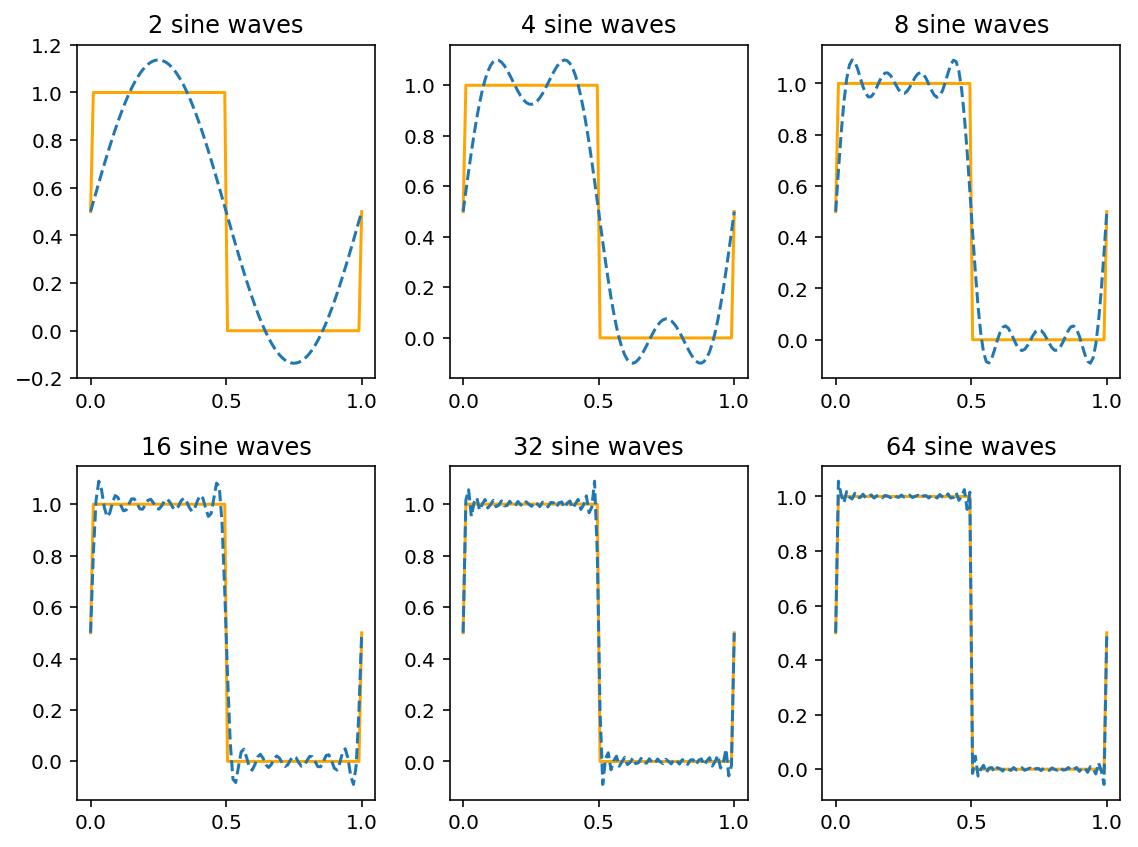

In [3]:
# Combinations of sine and cosine waves can model arbitrary signals (the more frequencies considered, the more 
# accurate the approximation of the signal)
n = 100
x = np.linspace(0, 1, n)

# Define squarewave
y = np.ones((n,)) * 0.5
y[1:50] = 1
y[50:-1] = 0

print('Approximating a square wave')
fig, axs = plt.subplots(2, 3, figsize=(8,6), )
for ax, N in zip(axs.flatten(), np.logspace(np.log10(2), np.log10(64), 6)):
    
    f = np.ones((100,)) * 0.5
    for i in np.arange(1, N+1, 2):
        a = 2 / np.pi / i
        f += a * np.sin(2 * np.pi * i * x)
    ax.plot(x, y, color='orange')
    ax.plot(x, f, '--')
    ax.set_title('%0.0f sine waves'%N)
plt.tight_layout()

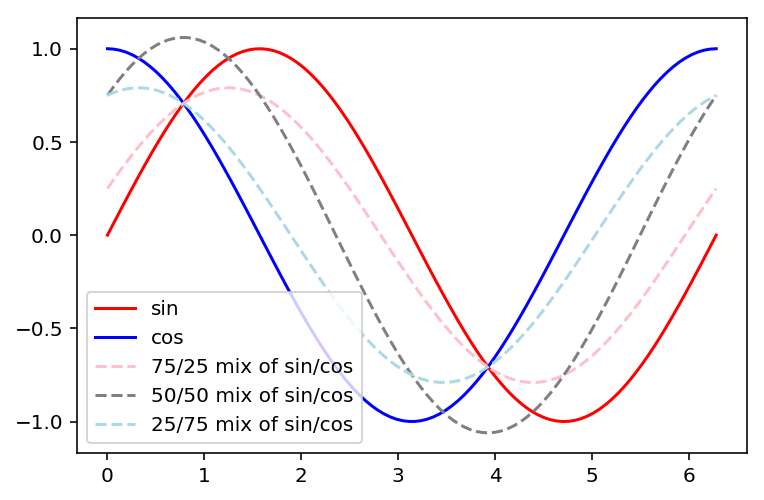

In [4]:
# Sin and Cos differ only in phase; they can be combined to make waveforms with arbitrary phases
x = np.linspace(0, 2*np.pi, 100)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), label='sin', color='r')
ax.plot(x, np.cos(x), label='cos', color='b')
ax.plot(x, 0.75 * np.sin(x) + 0.25 * np.cos(x), label='75/25 mix of sin/cos', color='pink', ls='--')
ax.plot(x, 0.75 * np.sin(x) + 0.75 * np.cos(x), label='50/50 mix of sin/cos', color='gray', ls='--')
ax.plot(x, 0.25 * np.sin(x) + 0.75 * np.cos(x), label='25/75 mix of sin/cos', color='lightblue', ls='--')
plt.legend()

On the mysterious relationship between the natural exponent ($e$) being raised to powers of $\pi$  and $i$ (which is equal to $\sqrt{-1}$):

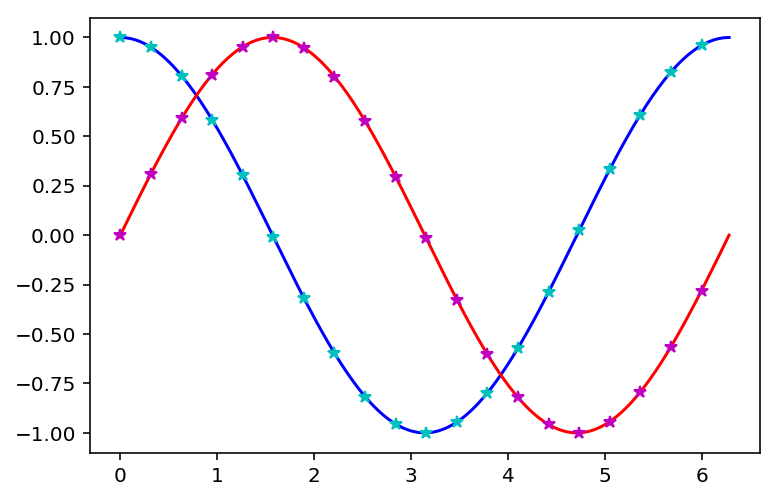

In [5]:
# x ranges from 0 to 2pi
x = np.linspace(0, 2*np.pi, 200)
# Plot real and imaginary components of e^(i*x)
plt.plot(x, np.real(np.exp(1j*x)), 'b')
plt.plot(x, np.imag(np.exp(1j*x)), 'r')
# Plot sin and cos of x to show that they're the same thing (the asterisks
# should fall exactly on the line)
plt.plot(x[::10], np.sin(x[::10]), 'm*')
plt.plot(x[::10], np.cos(x[::10]), 'c*');

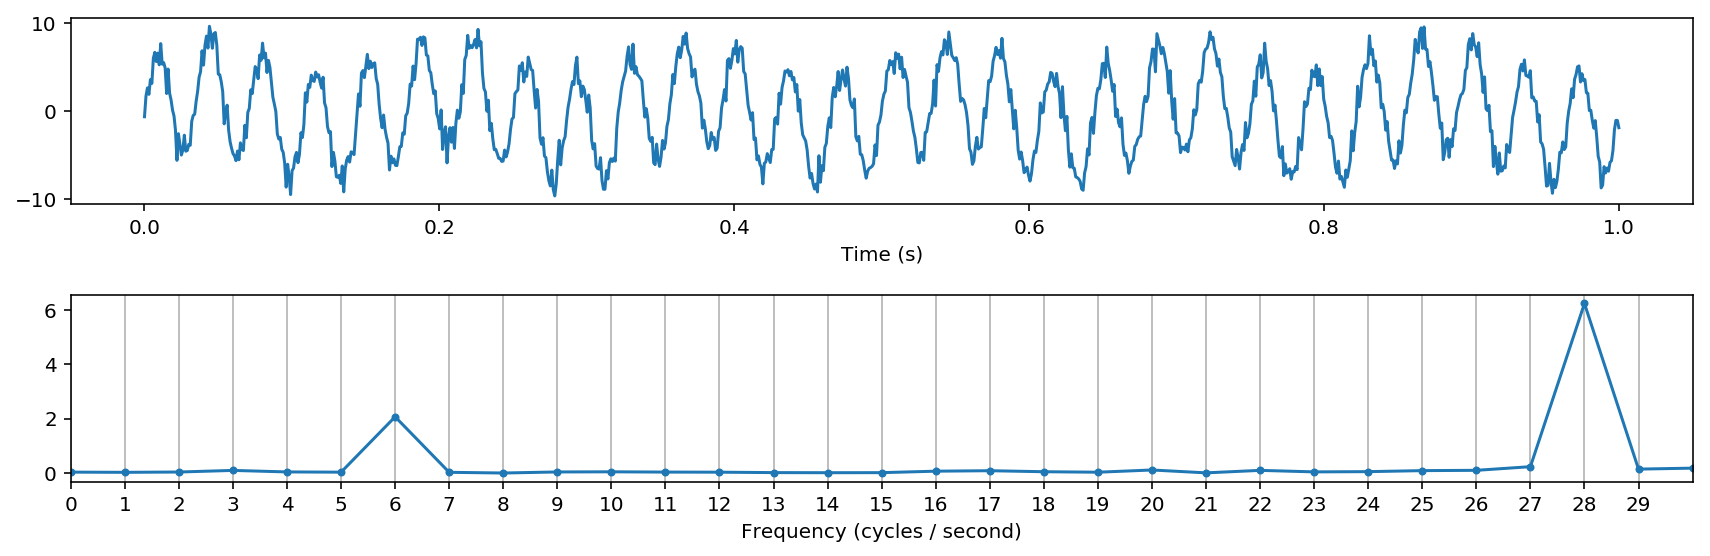

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(12, 4))

# Generate and plot simple frequency signal
N = 1000 ## number of points 
T = 1.0 ## define time of interval, for simplicity 1 second, but this will work with other (integer) durations
signal_freq = [6, 28]
values = [2, 6.2]
t = np.linspace(0, 1, N) * T
f = np.zeros(t.shape)
for sig_f, val in zip(signal_freq, values):
    f += np.sin(2 * np.pi * sig_f * t) * val
# Add noise
f += np.random.randn(*f.shape)
axs[0].plot(t, f)
axs[0].set_xlabel('Time (s)')
# Show Fourier transform
p = np.abs(np.fft.fft(f)) / (N / 2) ## absolute value of the fft 
                       # NOTE: abs value of fft = sqrt(real^2 + imag^2) -
                       # which is the (vector) distance in the real /
                       # imaginary coordinate plane. 
p = p[:int(np.ceil(N/2))] # **2? # take the power of positve freq. half 
freq = np.arange(N/2) / T # [0:N/2-1]/T ## find the corresponding frequency in Hz 
axs[1].plot(freq, p, '.-') ## plot on semilog scale 
xl = 30
axs[1].set_xlim(0, xl)
plt.xticks(range(xl))
plt.grid(axis='x')
plt.xlabel('Frequency (cycles / second)');
plt.tight_layout()

Some Fourier transforms of other functions:

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


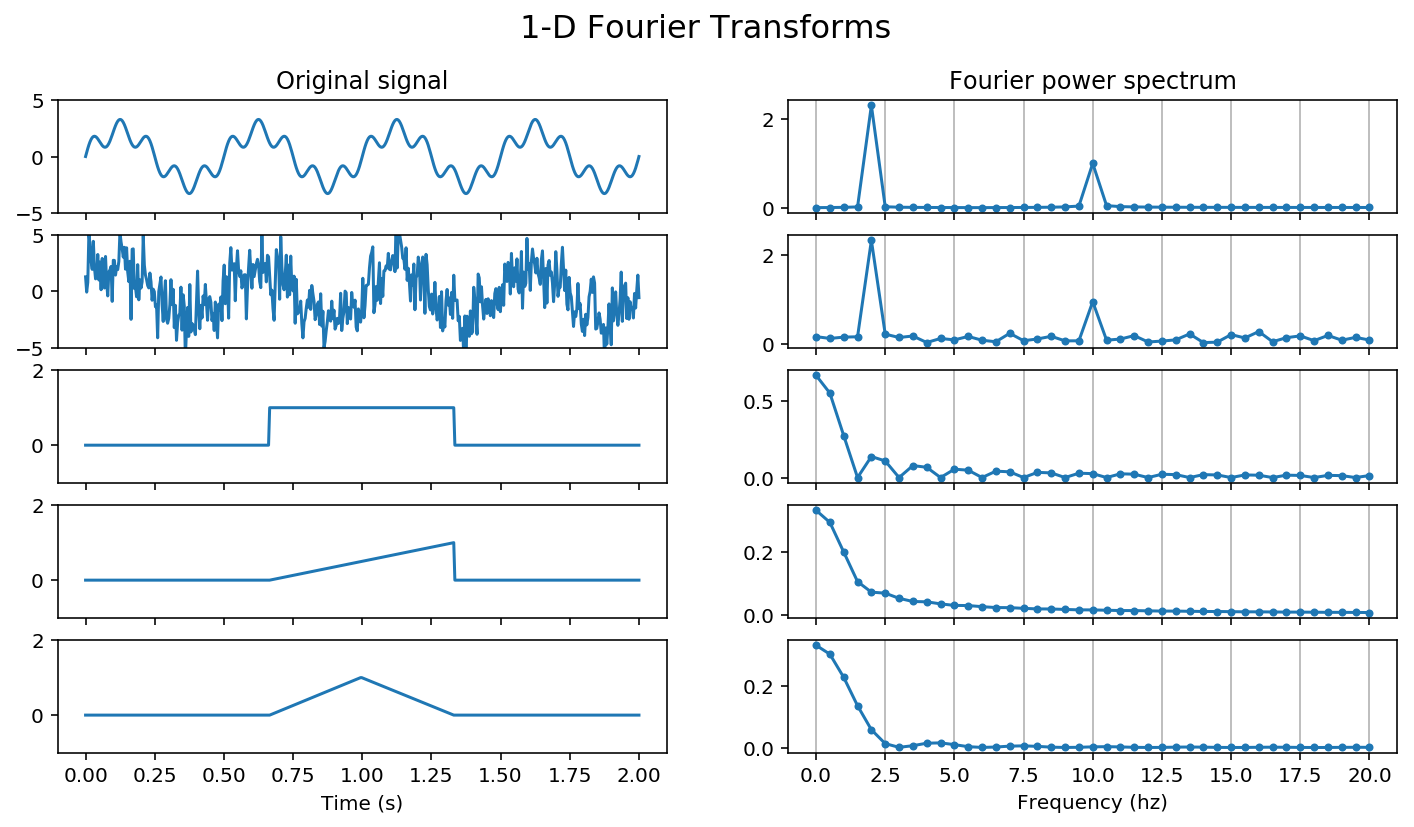

In [7]:
# First: one-dimensional Fourier transforms
#plt.subplots(figsize=(8, 9))


max_freq = 20 # For fft frequency plots

N = 500 # samples in signal
T = 2.0 # seconds
t = np.linspace(0, 1, N) * T # define time in seconds 
signals = list()
# Simple frequency
tmp = np.sin(2 * np.pi * 10 * t) + 2.3 * np.sin(2 * np.pi * 2 * t)
signals.append(tmp)
# Simple frequency + noise
noise_std = 1.5
signals.append(signals[0] + np.random.randn(*signals[0].shape) * noise_std)
# Square wave
tmp = np.zeros(signals[0].shape)
st, fin =  int(np.floor(N * 0.333)), int(np.ceil(N * 0.666))
middle_third_n =  fin - st
tmp[st:fin] = 1
signals.append(tmp)
# Ramp
tmp = np.zeros(signals[0].shape)
tmp[st:fin] = np.linspace(0, 1, middle_third_n)
signals.append(tmp)
# Triangle
tmp = np.zeros(signals[0].shape)
tmp[st:fin] = np.hstack([np.linspace(0, 1, np.floor(middle_third_n/2)), np.linspace(1, 0, np.ceil(middle_third_n/2))])
signals.append(tmp)

ylims = [[-5, 5], [-5, 5], [-1, 2], [-1, 2], [-1, 2]]
fig, axs = plt.subplots(5, 2, figsize=(12, 6), sharex=False)
plt.suptitle('1-D Fourier Transforms', fontsize=16) # x=0.5, y=0.88
do_title = True
tick_ct = 0
for tmp, y, yl in zip(axs, signals, ylims):
    ax1, ax3 = tmp
    #ax1, ax2, ax3 = tmp
    ff = np.abs(np.fft.fft(y)) / (N/2) # absolute value of the fft 
    p = ff[:int(N/2)]**2 # take the power of positve freq. half 
    freq = np.arange(int(N/2)) / T  # find the corresponding frequency in Hz 
    ax1.plot(t, y)
    ax1.set_ylim(yl)
    # Fourier transform
    #ax2.semilogy(freq, p, '.-')      ## ax.plot on semilog scale 
    #ax2.axis([10e-7, max_freq, 0, 1.2])     ## zoom in 
    # Cutoff 
    frequency_cutoff = np.sum(freq <= max_freq)
    ax3.plot(freq[:frequency_cutoff], ff[:frequency_cutoff], '.-')
    ax3.grid(axis='x')
    if do_title:
        ax1.set_title('Original signal')
        #ax2.set_title('Fourier power spectrum')
        ax3.set_title('Fourier power spectrum')
        do_title = False
    tick_ct += 1
    if tick_ct < 5:
        ax1.set_xticklabels([])
        #ax2.set_xticks([])
        ax3.set_xticklabels([])
    else:
        ax1.set_xlabel("Time (s)")
        ax3.set_xlabel("Frequency (hz)")
#plt.tight_layout()

Aliasing of high frequencies

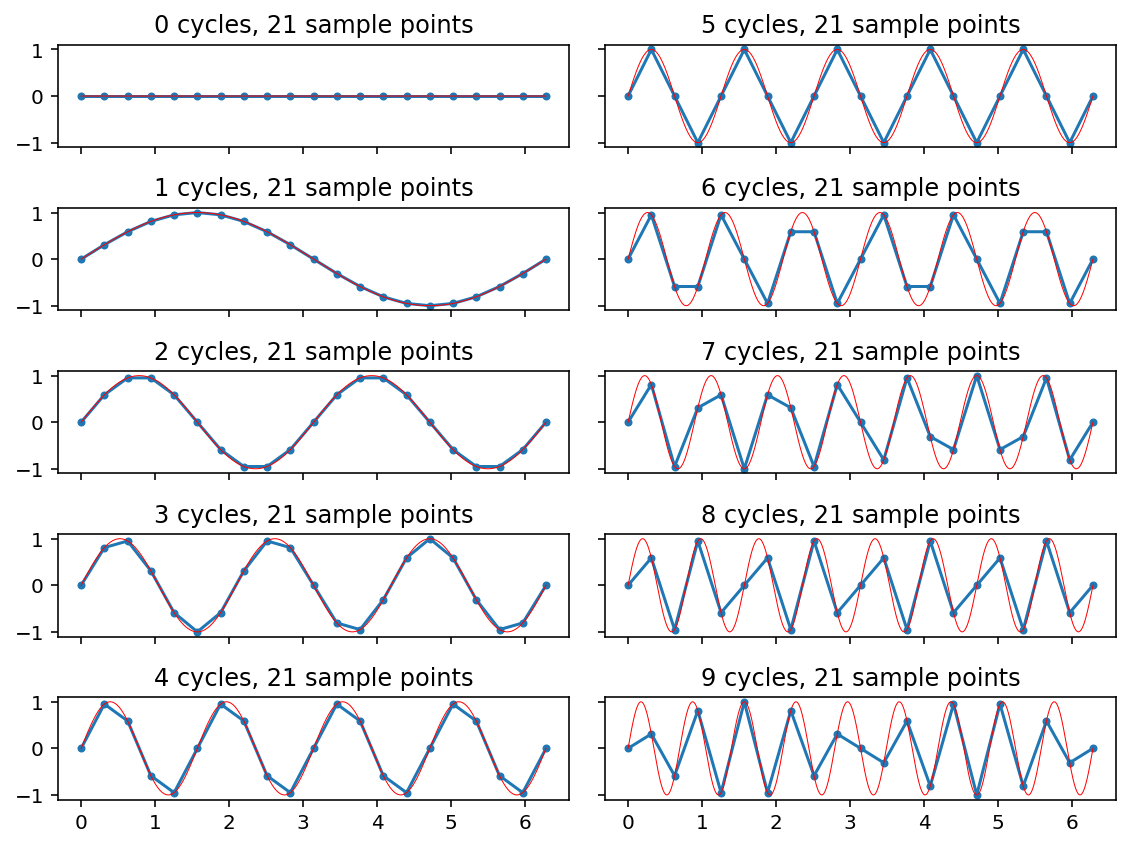

In [8]:
n = 21
x = np.linspace(0, np.pi*2, n)
xx = np.linspace(0, np.pi*2, n*100)
t = np.arange(n)
fig, axs = plt.subplots(5,2, figsize=(8,6), sharex=True, sharey=True)
for i, ax in enumerate(axs.T.flatten()):
    ax.plot(x, np.sin(i*x), '.-')
    ax.plot(xx, np.sin(i*xx), lw=0.5, color='r')
    ax.set_title('%d cycles, %d sample points'%(i, n))
plt.tight_layout()